<a href="https://colab.research.google.com/github/robertopaulo/IA_python/blob/main/10_primeira_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
import os
from PIL import Image,ImageStat
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import torch
import torch.nn as nn
from torch.utils.data import  DataLoader
import torchvision.transforms as transforms

from torch import optim 
import sklearn.metrics as metrics

In [ ]:
import torch.nn.functional as F

In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.2 MB/s 
     |████████████████████████████████| 181 kB 70.5 MB/s 
     |████████████████████████████████| 145 kB 60.4 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=100463e3b4a7f3a1b8bb55419c51909ac109bf4b6dfdaf25969453db06b51e62
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:


import wandb

# 1. Start a new run
wandb.init(project='aula_mlnlp', entity='edsontm')

  

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


KeyboardInterrupt: ignored

#Rede Convolucional

In [ ]:
                #(batch,channels,height,width)
x = torch.randn(10,3,50,50)

In [ ]:
conv1 = nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1,padding=0)

In [ ]:
res = conv1(x)

In [ ]:
res.shape

torch.Size([10, 6, 46, 46])

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1,padding=0)
        self.maxpool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5)

        self.fc1   = nn.Linear(1296,120)
        self.fc2   = nn.Linear(120,84)
        self.fc3   = nn.Linear(84,2)
    def forward(self,x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1,1296)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x



In [ ]:
class LeNet2(nn.Module):
    def __init__(self):
        super(LeNet2,self).__init__()
        self.features    = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1,padding=0),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2,2),
            nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2,2),
            nn.Flatten(),
        )
        self.classifiers = nn.Sequential(
            nn.Linear(1296,120),
            nn.Linear(120,84),
            nn.Linear(84,2)

        )
    def forward(self,x):
        x = self.features(x)
        x = self.classifiers(x)
        return x

In [ ]:
class LeNet3(nn.Module):
    def __init__(self,input_dim = (3,50,50),number_classes = 2):
        super(LeNet3,self).__init__()
        number_channels = input_dim[0]
        self.features    = nn.Sequential(
            nn.Conv2d(in_channels=number_channels,out_channels=6,kernel_size=5,stride=1,padding=0),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2,2),
            nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2,2),
            nn.Flatten(),
        )
        embedded = self.features(torch.randn(1,input_dim[0],input_dim[1],input_dim[2]))
        feature_size = embedded.shape[1]
        self.classifiers = nn.Sequential(
            nn.Linear(feature_size,120),
            nn.Linear(120,84),
            nn.Linear(84,number_classes)

        )
    def forward(self,x):
        x = self.features(x)
        x = self.classifiers(x)
        return x

In [ ]:
import torchsummary

In [ ]:
#x = torch.randn(10,3,50,50)

In [ ]:
model = LeNet()


In [ ]:
#torchsummary.summary(model,(3,50,50),device='cpu')

In [ ]:
model2 = LeNet2()

In [ ]:
torchsummary.summary(model2,(3,50,50),device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 46, 46]             456
              ReLU-2            [-1, 6, 46, 46]               0
         MaxPool2d-3            [-1, 6, 23, 23]               0
            Conv2d-4           [-1, 16, 19, 19]           2,416
              ReLU-5           [-1, 16, 19, 19]               0
         MaxPool2d-6             [-1, 16, 9, 9]               0
           Flatten-7                 [-1, 1296]               0
            Linear-8                  [-1, 120]         155,640
            Linear-9                   [-1, 84]          10,164
           Linear-10                    [-1, 2]             170
Total params: 168,846
Trainable params: 168,846
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.03
Forward/backward pass size (MB): 0.33
Params size (MB): 0.64
Estimated T

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
res.shape

torch.Size([10, 6, 46, 46])

# construção do dataset

Abra o browser e faça uma busca sobre a classe desejadan no site http://flickr.com

Na pagina de busca digite `<crtl>-<shift>-j` e no console cole o código abaixo
```
urls =  Array.from(document.querySelectorAll("div.photo-list-photo-view.awake")).map(el => el.style.backgroundImage.replace("url(\"//","http://").replace("\")","")); window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Salve o arquivo como csv 

Caso tenha adblocker, você precisa desabilitá-lo.

In [ ]:
def download_images(main_dir,urls_filename):
    class_name = urls_filename.split('.')[-2]
    output_dir = main_dir+os.sep+class_name
    os.makedirs(output_dir,exist_ok=True)
    with open(urls_filename) as f:
        for url in f:
            img_filename = url.split('/')[-1].replace("\n","")
            print(img_filename)
            try:
                response = urllib.request.urlopen(url)
                open(output_dir+'/'+img_filename,mode="wb+").write(response.read())
            except:
                print('nao conseguiu baixar ',url)

In [ ]:
!pwd

/content


In [ ]:
main_dir = "/content/drive/MyDrive/aulanlp"

In [ ]:
os.chdir(main_dir)

In [ ]:
!ls

best_model_mobilenet_v3.pth  best_model_vgg.pth  fusca.csv  girafa.csv
best_model.pth		     fusca		 girafa


In [ ]:
#download_images(main_dir,'fusca.csv')

In [ ]:
#download_images(main_dir,'girafa.csv')

## construção do loader

In [ ]:
def image_loader(img):
    return Image.open(img).convert("RGB")

In [ ]:
img = image_loader('./girafa/6157778905_3ee050621a_n.jpg')

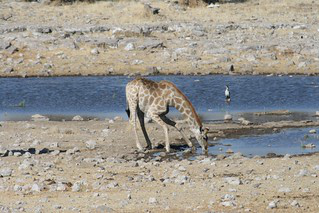

In [ ]:
img

In [ ]:
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                            ])

In [ ]:
img_tensor = transform(img)

In [ ]:
img_tensor.shape

torch.Size([3, 224, 224])

## Construção da classe Dataset

In [ ]:
!ls

best_model_mobilenet_v3.pth  best_model_vgg.pth  fusca.csv  girafa.csv
best_model.pth		     fusca		 girafa


In [ ]:
dir = './'

In [ ]:
for file_names in os.scandir('./'):
    print(file_names)

<DirEntry 'fusca.csv'>
<DirEntry 'girafa.csv'>
<DirEntry 'fusca'>
<DirEntry 'girafa'>
<DirEntry 'best_model.pth'>
<DirEntry 'best_model_mobilenet_v3.pth'>
<DirEntry 'best_model_vgg.pth'>


In [ ]:
classes = [d.name for d in os.scandir(dir) if d.is_dir()]

In [ ]:
classes

['fusca', 'girafa']

In [ ]:
class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}

In [ ]:
class_to_idx

{'fusca': 0, 'girafa': 1}

In [ ]:
dataset = torchvision.datasets.DatasetFolder('./',loader = image_loader,extensions='jpg',transform=transform )

In [ ]:
np.unique(dataset.targets,return_counts=True)

(array([0, 1]), array([364, 368]))

In [ ]:
instances = []
for target_class in sorted(class_to_idx.keys()):
        class_index = class_to_idx[target_class]
        target_dir = os.path.join(dir, target_class)
        for root, _, fnames in sorted(os.walk(target_dir, followlinks=True)):
            for fname in sorted(fnames):
                path = os.path.join(root, fname)
                item = path, class_index
                instances.append(item)

In [ ]:
instances

[('./fusca/12486187053_18d37067c8_n.jpg', 0),
 ('./fusca/1254758682_4677d1c2cf_n.jpg', 0),
 ('./fusca/134818392_960dee32ab_n.jpg', 0),
 ('./fusca/1375205542_88662a4f45_n.jpg', 0),
 ('./fusca/1400491752_6f2b60718d_n.jpg', 0),
 ('./fusca/1414205931_14ee3a2814_n.jpg', 0),
 ('./fusca/14634828237_33d61456e2_n.jpg', 0),
 ('./fusca/14818334411_7c6c81ffc1_n.jpg', 0),
 ('./fusca/14822749758_43732a0912_n.jpg', 0),
 ('./fusca/14835216419_4fd2cf0fc8_n.jpg', 0),
 ('./fusca/14835231309_f03415967b_n.jpg', 0),
 ('./fusca/14835420288_dc5cb4e1e2_n.jpg', 0),
 ('./fusca/14835463017_602937fc3f_w.jpg', 0),
 ('./fusca/14835481498_7a2e6e13dc_w.jpg', 0),
 ('./fusca/14835505597_5b217d9fc6_n.jpg', 0),
 ('./fusca/14835553517_5d999f5bde_n.jpg', 0),
 ('./fusca/14835612397_48f567ed23_n.jpg', 0),
 ('./fusca/14835621257_98d246ce64_w.jpg', 0),
 ('./fusca/14835659210_dfe6e8801f_n.jpg', 0),
 ('./fusca/14835664217_f995f7306b_n.jpg', 0),
 ('./fusca/14835669270_6aba28cbbb_n.jpg', 0),
 ('./fusca/14835699377_5679dde962_n.jpg'

In [ ]:
from torch.utils.data import Dataset

from typing import Any,Tuple

class CarrosDataset(Dataset):
    def __init__(self,dir,transform=None,target_transform=None,loader = None):
        self.main_dir = dir
        self.transform = transform
        self.target_transform = target_transform
        self.classes = [d.name for d in os.scandir(dir) if d.is_dir()]
        self.classes.sort()
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        self.targets = []
        self.instances = self.make_instances()
        self.loader = loader
        
        if loader is None:
            self.loader = lambda x: Image.open(x).convert('RGB')

    def make_instances(self):
        instances = []
        targets = []
        for target_class in sorted(self.class_to_idx.keys()):
                class_index = self.class_to_idx[target_class]
                target_dir = os.path.join(self.main_dir, target_class)
                for root, _, fnames in sorted(os.walk(target_dir, followlinks=True)):
                    for fname in sorted(fnames):
                        path = os.path.join(root, fname)
                        item = path, class_index
                        targets.append(class_index)
                        instances.append(item)
        self.targets = torch.tensor(targets)
        return instances
    def __getitem__(self,index:int) -> Tuple[Any,Any]:
        path, target = self.instances[index]
        instance = self.loader(path)
        if self.transform is not None:
            instance = self.transform(instance)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return instance,target
    def __len__(self) -> int:
        return len(self.instances)



In [ ]:
dataset = CarrosDataset('./',transform=transform)

In [ ]:
len(dataset)

732

# Treinamento da rede

In [ ]:
ds = dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
np.unique(ds.targets,return_counts=True)

(array([0, 1]), array([364, 368]))

In [ ]:
bs = 256
train_idx, temp_idx = train_test_split(np.arange(len(ds)),test_size=0.3,shuffle=True,stratify=ds.targets)
valid_idx, test_idx = train_test_split(temp_idx,test_size=0.5,shuffle=True,stratify=ds.targets[temp_idx])
 
train_sampler = torch.utils.data.SubsetRandomSampler(train_idx)
valid_sampler = torch.utils.data.SubsetRandomSampler(valid_idx)
test_sampler  = torch.utils.data.SubsetRandomSampler(test_idx)
 
dl_train = torch.utils.data.DataLoader(ds,batch_size=bs,sampler=train_sampler)
dl_valid = torch.utils.data.DataLoader(ds,batch_size=bs,sampler=valid_sampler)
dl_test  = torch.utils.data.DataLoader(ds,batch_size=bs,sampler=test_sampler)

In [ ]:
np.unique(ds.targets[train_idx],return_counts=True)

(array([0, 1]), array([255, 257]))

In [ ]:
np.unique(ds.targets[temp_idx],return_counts=True)

(array([0, 1]), array([109, 111]))

In [ ]:
x,y = next(iter(dl_train))

In [ ]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)

In [ ]:
#model = torchvision.models.mobilenet_v3_small(pretrained=True)
#model.classifier[3] = nn.Linear(1024,2)

In [ ]:
#model.to(device)

MobileNetV3(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (relu): ReLU(inplace=True)
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
        )
        (2): ConvBNActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_r

In [ ]:
import torchvision.models as models

In [ ]:
#model = LeNet3(input_dim=(3,244,244))
model = models.mobilenet_v3_small(pretrained=True)

In [ ]:
lista = [0,1,2,3,4,5,6,7,8,9,10]

In [ ]:
modules = list(model.features.children())[:-4] # tirando as camadas 11 e 12

In [ ]:
len(modules)
model.features = nn.Sequential(*modules)

In [ ]:
model

MobileNetV3(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (relu): ReLU(inplace=True)
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
        )
        (2): ConvBNActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_r

In [ ]:
#for param in model.parameters():
#    param.requires_grad = False

In [ ]:
x = torch.randn(10,3,224,224).to(device)
pred = model.avgpool(model.features(x))

In [ ]:
pred.shape 

torch.Size([10, 40, 1, 1])

In [ ]:
input_dim = pred.shape[1]*pred.shape[2]*pred.shape[3]

In [ ]:
model.classifier[0] = nn.Linear(input_dim,1024)
model.classifier[3] = nn.Linear(1024,2)

In [ ]:
model.to(device)



MobileNetV3(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (relu): ReLU(inplace=True)
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
        )
        (2): ConvBNActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_r

In [ ]:
criterion = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(),lr=0.1)

In [ ]:
epochs = 100
loss_train = []
loss_eval  = []
stop = False
epoch = 0
lowest_loss_eval = 10000
last_best_result = 0
while (not stop):
    wandb.watch(model)
    model.train()
    lloss = []
    for x,y in dl_train:
        x = x.to(device)
        y = y.to(device)
        pred = model(x)
        closs = criterion(pred,y)
        closs.backward()
        opt.step()
        opt.zero_grad()
        lloss.append(closs.item())
        #print(closs.item())
    loss_train.append(np.mean(lloss))
    llos = []
    model.eval()
    lres = []
    ytrue = []
    with torch.no_grad():
        for data,y in dl_valid:
            data = data.to(device)

            pred = model(data)
            closs = criterion(pred.cpu(),y)
            lloss.append(closs.item())
            res  = pred.argmax(dim=1).cpu().tolist()
            lres += res
            ytrue += y
    avg_loss_eval = np.mean(lloss)
    loss_eval.append(avg_loss_eval)
    wandb.log({"loss_eval": avg_loss_eval,"loss_train":loss_train[-1]})
    if avg_loss_eval < lowest_loss_eval:
        lowest_loss_eval = avg_loss_eval 
        last_best_result = 0
        print("Best model found! saving...")
        actual_state = {'optim':opt.state_dict(),'model':model.state_dict(),'epoch':epoch}
        torch.save(actual_state,'best_model.pth')
    last_best_result += 1
    if last_best_result > 10:
        stop = True
    print("epoch %d loss_train %4.3f loss_eval %4.3f last_best %d"%(epoch,loss_train[-1],loss_eval[-1],last_best_result))
    epoch += 1

Best model found! saving...
epoch 0 loss_train 0.585 loss_eval 0.555 last_best 1
Best model found! saving...
epoch 1 loss_train 0.377 loss_eval 0.355 last_best 1
Best model found! saving...
epoch 2 loss_train 0.257 loss_eval 0.250 last_best 1
Best model found! saving...
epoch 3 loss_train 0.193 loss_eval 0.191 last_best 1
Best model found! saving...
epoch 4 loss_train 0.156 loss_eval 0.163 last_best 1
Best model found! saving...
epoch 5 loss_train 0.118 loss_eval 0.131 last_best 1
Best model found! saving...
epoch 6 loss_train 0.107 loss_eval 0.122 last_best 1
Best model found! saving...
epoch 7 loss_train 0.082 loss_eval 0.101 last_best 1
Best model found! saving...
epoch 8 loss_train 0.059 loss_eval 0.083 last_best 1
Best model found! saving...
epoch 9 loss_train 0.048 loss_eval 0.078 last_best 1
Best model found! saving...
epoch 10 loss_train 0.044 loss_eval 0.069 last_best 1
Best model found! saving...
epoch 11 loss_train 0.031 loss_eval 0.064 last_best 1
Best model found! saving..

In [ ]:
recover = torch.load('best_model.pth')
#actual_state = {'optim':opt.state_dict(),'model':model.state_dict(),'epoch':epoch}

In [ ]:
opt.state_dict = recover['optim']
model.state_dict = recover['model']
epoch = recover['epoch']

In [ ]:
epoch

18

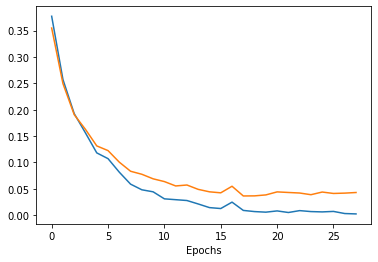

In [ ]:
import matplotlib.pyplot as plt
plt.ion()

fig = plt.figure()
plt.plot(loss_train[1:])
plt.plot(loss_eval[1:])
plt.xlabel('Epochs')
plt.show()

In [ ]:
import sklearn.metrics as metrics

In [ ]:
model.eval()
lres = []
ytrue = []
with torch.no_grad():
    for data,target in dl_test:
        data = data.to(device)
        pred = model(data)
        res  = pred.argmax(dim=1).cpu().tolist()
        lres += res
        ytrue += target

In [ ]:
metrics.confusion_matrix(ytrue,lres)

array([[53,  1],
       [ 3, 53]])

In [ ]:
metrics.accuracy_score(ytrue,lres)

0.9636363636363636

In [ ]:
metrics.precision_score(ytrue,lres)

0.9814814814814815

In [ ]:
metrics.recall_score(ytrue,lres)

0.9464285714285714

In [ ]:
metrics.f1_score(ytrue,lres)

0.9636363636363636

In [ ]:
class VGG11(nn.Module):
    def __init__(self):
        super(VGG11,self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,64,3,1,1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64,128,3,1,1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(128,256,3,1,1),
            nn.ReLU(),
            nn.Conv2d(256,256,3,1,1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(256,512,3,1,1),
            nn.ReLU(),
            nn.Conv2d(512,512,3,1,1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(512,512,3,1,1),
            nn.ReLU(),
            nn.Conv2d(512,512,3,1,1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Flatten()
        )
        self.classifier = nn.Sequential(
            nn.Linear(7*7*512,4096),
            nn.ReLU(),
            nn.Linear(4096,4096),
            nn.ReLU(),
            nn.Linear(4096,2)
            
        )

    def forward(self,x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [ ]:
model = VGG11()

In [ ]:
x = torch.randn(1,3,224,224)

In [ ]:
res = model(x)

In [ ]:
res.shape

torch.Size([1, 2])

In [ ]:
512*7*7

25088

In [ ]:
torchsummary.summary(model,(3,224,224))

RuntimeError: ignored